# pytesseract-tutorial

- `image_to_string` : Tesseract OCR 결과를 문자열로 반환
- `image_to_boxes` : Tesseract OCR 결과 인식된 문자와 경계를 반환
- `image_to_data` : Tesseract OCR 결과 상자 경계, 신뢰도 등의 정보를 반환, Tesseract 3.05 이상의 버전 필요
- `image_to_osd` :  오리엔테이션과 스크립트 탐지에 대한 정보가 들어있는 결과를 반환

이 중 image_to_string을 주로 이용

__image_to_string(image, lang=None, config='')__

`image` : 인식시킬 이미지

`lang` : 인식결과 나올 언어로 pytesseract 패키지 설치가 아닌 tesseract 프로그램 설치시 언어팩을 선택할 수 있다.

`config`

- psm 0-13 : page segmentation modes의 약자로 0->10으로 갈수록 단일 digit으로 간주, 11, 12는 텍스트로, 13은 가공되지 않은 여러줄의 문자열로 간주하여 OCR

- oem 0-3 : 0(Legacy 엔진), 1(Neural nets LSTM 엔진), 2(Legacy 엔진 + LSTM 엔진), 3(기본값으로, 사용할 수 있는것을 사용)

- config='-psm 0 -oem 0'과 같이 사용한다.

[Google Tesseract Github](https://github.com/tesseract-ocr/tesseract)

[Install Tesseract(Not pytesseract)](https://github.com/tesseract-ocr/tesseract/wiki)



In [1]:
from matplotlib import pyplot as plt
from PIL import Image
from pytesseract import *
from glob import glob
import os, cv2

In [2]:
def OCR(imgfile, lang='eng', config=""):
    im = Image.open(imgfile)
    
    if config == "":
        text = image_to_string(im, lang=lang)
        

    print('+++ OCR Result +++')
    print(text)

In [5]:
img_dir = "./data/ocr-test1.jpg"

In [6]:
OCR(img_dir)

+++ OCR Result +++
Existing System

The existingtesseractOCR supports English language as
default and also supports languages like Dutch, Spanish, Italian,
French and German. All these languages are trained to
tesseract OCR, but languages like Tamil, Malayalam are nut
much trained to OCR‘ There are no GUI available for tesseract
in tamii and training tesseract is a big task which an
intermediate persons too feel complex for training it Since
Tesseract OCR Engine is command line Tool, usage of OCR is
much less.


<img src="./Data/ocr-test1.png" width=400></img>

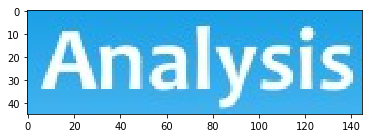

In [16]:
img = cv2.cvtColor(cv2.imread(img_dir), cv2.COLOR_BGR2RGB)
part = img[30:75, 230:375]
plt.imshow(part)

### test config

In [22]:
image_to_string(part, lang="eng", config="-psm 10")

'W'

In [32]:
for i in range(14):
    try:
        string = image_to_string(part, lang="eng", config="-psm "+str(i))
        print("try at ", i, "and result is ", string)
    except:
        print("error in  ", i)

error in   0
try at  1 and result is  Analysis
error in   2
try at  3 and result is  Analysis
try at  4 and result is  Analysis
try at  5 and result is  k.

5

IV
a

n

A
try at  6 and result is  Analysis
try at  7 and result is  Analysis
try at  8 and result is  Analysis
try at  9 and result is  
try at  10 and result is  W
try at  11 and result is  Analysis
try at  12 and result is  Analysis
try at  13 and result is  Analysis
